In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel("./data/2018 IPO_trans+pe.xlsx",header = 1)

In [4]:
df.columns

Index(['Name of Company', 'Industry ', 'curr', 'Current value',
       'market capitalization of company (billion)', 'ipo price', 'Date ',
       'P/E ratio of company ', 'CEO of company ', 'Location ', 'Sponsor',
       ' Lead Underwriter', 'Exchange company ', 'Sell- hold- buy '],
      dtype='object')

### Missing value rate

In [5]:
df.isnull().sum()/df.shape[0]

Name of Company                               0.000000
Industry                                      0.000000
curr                                          0.000000
Current value                                 0.003077
market capitalization of company (billion)    0.000000
ipo price                                     0.003077
Date                                          0.000000
P/E ratio of company                          0.224615
CEO of company                                0.381538
Location                                      0.000000
Sponsor                                       0.129231
 Lead Underwriter                             0.055385
Exchange company                              0.000000
Sell- hold- buy                               0.012308
dtype: float64

P/E ratio of company, CEO of company, Sponsor have high missing rate.

In [25]:
df.nunique()/df.shape[0]

Name of Company                               0.996923
Industry                                      0.113846
curr                                          0.012308
Current value                                 0.938462
market capitalization of company (billion)    0.975385
ipo price                                     0.790769
Date                                          0.015385
P/E ratio of company                          0.772308
CEO of company                                0.615385
Location                                      0.243077
Sponsor                                       0.403077
 Lead Underwriter                             0.732308
Exchange company                              0.018462
Sell- hold- buy                               0.027692
dtype: float64

Since there are many categorical variables. If most of strings in a categorical variable are not identical, it means they may cannot be classified.

Currency is unified, CEO is meaningless,too many different Lead underwriters and sponsors so we delete them.

In [6]:
df = df.drop(['curr','CEO of company ',' Lead Underwriter','Sponsor'],axis = 1)

# 1.WITH P/E RATIO

In [27]:
ipo = df.dropna()

In [28]:
ipo.shape

(250, 10)

In [29]:
ipo.describe()

,Current value,market capitalization of company (billion),ipo price,P/E ratio of company
count,250.000000,250.000000,250.000000,250.000000
mean,17.161868,10.505371,12.287345,144.435380
std,24.400813,29.976015,18.394386,1749.983507
min,0.074800,0.059840,0.000000,-164.880000
25%,0.818125,0.400204,0.867000,12.499500
50%,5.612000,2.995825,4.710000,24.476000
75%,28.765000,7.058750,16.945000,40.262500
max,165.850000,258.819900,120.600000,27696.000000


In [31]:
ipo = ipo[ipo['P/E ratio of company ']>0]

In [65]:
ipo['Date '] = ipo['Date '].apply(lambda x:x.strip())

In [67]:
ipo['date'] = pd.to_datetime(ipo['Date '],format = '%b %d,%Y')

In [69]:
ipo.drop('Date ',axis =1,inplace = True)

In [78]:
ipo['day'] = ipo['date'].apply(lambda x:x.day)

In [82]:
ipo['day'].unique()

array([30, 31, 29, 28,  6])

## Months are so few, only keep day as predictor

In [85]:
ipo.columns

Index(['Name of Company', 'Industry ', 'Current value',
       'market capitalization of company (billion)', 'ipo price',
       'P/E ratio of company ', 'Location ', 'Exchange company ',
       'Sell- hold- buy ', 'date', 'year', 'month', 'day'],
      dtype='object')

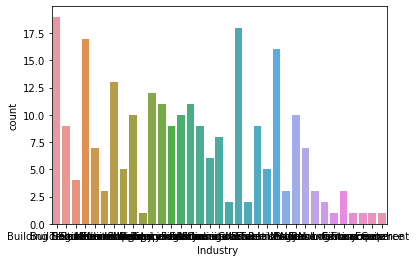

In [97]:
sns.countplot(x = 'Industry ',data = ipo)

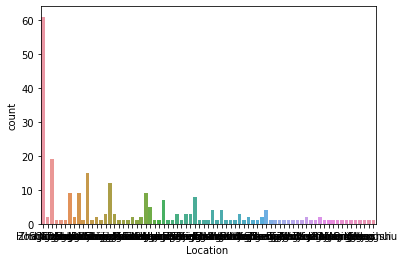

In [99]:
sns.countplot(x = 'Location ',data = ipo)

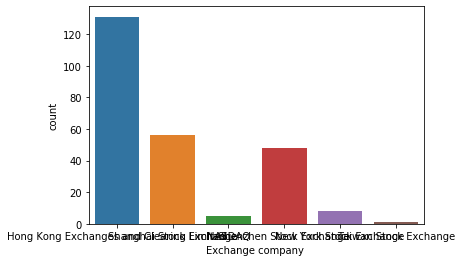

In [100]:
sns.countplot(x = 'Exchange company ',data = ipo)

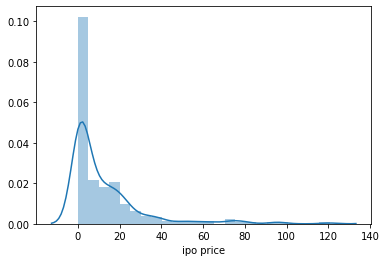

In [115]:
sns.distplot(ipo['ipo price'])

In [109]:
X = ipo[['Industry ',
         'Current value',
        'market capitalization of company (billion)',
        'P/E ratio of company ',
         'Location ','Exchange company ',
        'Sell- hold- buy ',
         'day']]
y = ipo['ipo price']

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
le_x = LabelEncoder()

In [112]:
X.iloc[:,0] = le_x.fit_transform(X.iloc[:,0])
X.iloc[:,4] = le_x.fit_transform(X.iloc[:,4])
X.iloc[:,5] = le_x.fit_transform(X.iloc[:,5])
X.iloc[:,6] = le_x.fit_transform(X.iloc[:,6])

In [113]:
X.head()

,Industry,Current value,market capitalization of company (billion),P/E ratio of company,Location,Exchange company,Sell- hold- buy,day
2,1,0.10880,0.13056,4.599,18,0,4,30
4,32,0.21250,0.17000,4.679,69,0,4,30
5,2,0.10200,0.20400,10.874,18,0,4,30
7,15,0.18105,0.18105,140.132,18,0,4,30
12,32,0.07565,0.07565,9.219,18,0,4,30


In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3) 

In [119]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
pred1 = lr.predict(X_test)

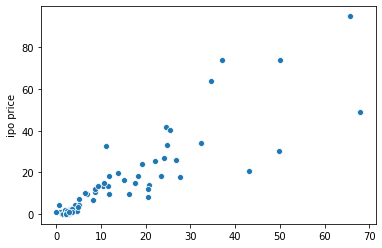

In [127]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred1)

sns.scatterplot(x = pred1,y = y_test)

# classification